# week_06

## Ch.07 - NLTK Corpus

In [1]:
import nltk
nltk.download() #괄호를 빈칸으로 두면 선택창을 통해 다운로드할 항목을 선택할 수 있음

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
import nltk
nltk.download(['inaugural', 'brown']) #Corpus 다운로드

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Bon\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Bon\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

### Brown

In [3]:
brown = nltk.corpus.brown

In [4]:
#장르에 따른 법조동사 사용 빈도
cfd1 = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

genres = brown.categories()[:5]#카테고리 앞에서 5개만
modals = ['can', 'could', 'will', 'would', 'may', 'might']
cfd1.tabulate(conditions=genres, samples=modals)

                 can could  will would   may might 
     adventure    46   151    50   191     5    58 
belles_lettres   246   213   236   392   207   113 
     editorial   121    56   233   180    74    39 
       fiction    37   166    52   287     8    44 
    government   117    38   244   120   153    13 


In [5]:
#위 코드에서 genres와 modals를 ConditionalFreqDist 내부에 포함시키는 법
cfd2 = nltk.ConditionalFreqDist(
    (genre, modals) #표의 x축과 y축을 변경하려면 genre와 modals의 위치를 바꿔주기
    for genre in brown.categories()[:5] #모든 장르에 대해 조사하려면 [:5] 지우기
    for modals in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories=genre)
        if word.lower() == modals
)

cfd2.tabulate()

                 can could   may might  will would 
     adventure    48   154     7    59    51   194 
belles_lettres   249   216   221   113   246   397 
     editorial   124    57    79    39   235   185 
       fiction    39   168    10    44    56   291 
    government   119    38   179    13   244   120 


In [6]:
'''
for word in brown.words(categories=genre)
    if word.lower() == modals
부분이 필요한 이유?
'''
cfd_test1 = nltk.ConditionalFreqDist(
    (genre, modals)
    for genre in brown.categories()[:5]
    for modals in ['can', 'could', 'will', 'would', 'may', 'might']
)

cfd_test1.tabulate()

                 can could   may might  will would 
     adventure     1     1     1     1     1     1 
belles_lettres     1     1     1     1     1     1 
     editorial     1     1     1     1     1     1 
       fiction     1     1     1     1     1     1 
    government     1     1     1     1     1     1 


- 해당 부분을 제외하고 실행해보면 modal verb이 전부 1로만 출력됨
- genre와 modals의 리스트만 순회하기 때문에 genre당 modal verb이 하나씩만 들어가게 됨(genre별로 사용된 modal verb의 횟수는 측정하지 못하게 됨)

In [7]:
cfd_test2 = nltk.ConditionalFreqDist(
    (genre, modals)
    for genre in brown.categories()[:5]
    for modals in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories=genre)
        if word.lower() == modals #들여쓰기 필수 아님
    #genre에 단어를 순회하면서 modal verb이 있을 때만 카운트 하는 역할을 수행
)

cfd_test2.tabulate()

                 can could   may might  will would 
     adventure    48   154     7    59    51   194 
belles_lettres   249   216   221   113   246   397 
     editorial   124    57    79    39   235   185 
       fiction    39   168    10    44    56   291 
    government   119    38   179    13   244   120 


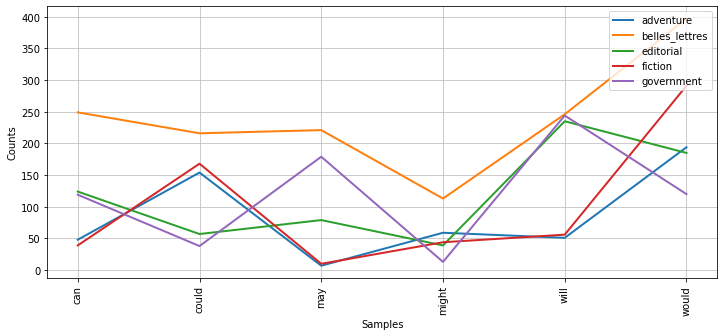

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
#표가 아닌 그래프로 표현하기
#라이브러리를 import해야함
import matplotlib.pyplot as plt #함수를 plt라는 이름으로 받기
plt.figure(figsize=(12, 5)) #그래프의 가로, 세로 길이(단위: inch)
cfd2.plot()

### Inaugural
- 미 대통령 연설문 데이터를 담은 corpus

In [9]:
inaugural = nltk.corpus.inaugural

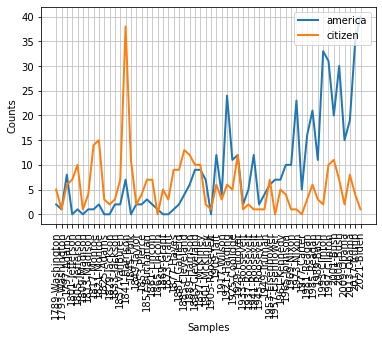

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
#inaugural에서 america, citizen의 빈도수를 연도별로 측정
#fileid에서 .txt제거
cfd3 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4]) #x, y축 바꾸려면 순서 바꾸기
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen']
    
    for word in inaugural.words(fileids=fileid)
        if word.lower().startswith(target_word) #target_word로 시작한 다른 단어도 유사한 뉘앙스로 사용되었을 가능성이 크기 때문에 측정에 포함하는 것이 논리적으로 타당함
)

cfd3.plot()

## Ch.07 - List & Tuple

### list와 tuple 비교

#### 1. 생성하기

In [11]:
#빈 list 생성하기
list1 = []
list2 = list()

#빈 tuple 생성하기
tuple1 = ()
tuple2 = tuple()

print(list1, list2, tuple1, tuple2)

[] [] () ()


In [12]:
#요소가 존재할 때
list1 = ['a', 'b']
tuple1 = ('a', 'b')
tuple2 = 'a', 'b' #괄호는 없어도 됨

print(list1, tuple1, tuple2)

['a', 'b'] ('a', 'b') ('a', 'b')


In [13]:
#tuple의 경우 요소가 한 개 일 때는 ','를 붙여야 함

tuple1 = ('a',)
tuple2 = 'a',

print(tuple1, tuple2)

('a',) ('a',)


In [14]:
#','를 붙이지 않을 경우 문자열이나 숫자로 인식
tuple1 = 'a'
tuple2 = (2)

type(tuple1), type(tuple2)

(str, int)

#### 2. 여러 변수 할당하기
- packing: 변수 하나에 하나 이상의 데이터를 할당하는 것
  - 리스트, 튜플, 자체가 packing의 기능을 함
  - ex) a = [1, 2, 3, 4]
- unpacking: 하나의 변수에 존재하는 하나 이상의 데이터를 여러 변수에 나눠 할당하는 것
  - ex) a, b, c = [1, 2, 3] => a = 1, b = 2, c = 3

In [15]:
#list, tuple과 같은 자료형 뿐 아니라 문자열도 unpacking할 수 있음
word = 'apple'
a, b, c, d, e = word
print(a, b, c, d, e)

a p p l e


In [16]:
#두 변수의 값을 교환하는 방법
#1. 다른 변수를 통해 교환
a = 'hello'
b = 'world'

temp1 = a
temp2 = b
a = temp2
b = temp1

a, b

('world', 'hello')

In [17]:
#2. tuple과 unpacking을 이용해 값을 교환
a = 'hello'
b = 'world'

a, b = b, a #우측의 b, a가 tuple이 되어 다시 좌측의 변수 a, b에 할당됨

a, b

('world', 'hello')

#### 3. 연산
- list와 tuple이 동일함

In [18]:
#합 연산(+)
#두 변수를 하나의 list혹은 tuple로 합치는 기능
[1, 2] + [3]

[1, 2, 3]

In [19]:
(1, 2) + (3,) #tuple을 연산할 때는 반드시 괄호를 써줘야함

(1, 2, 3)

In [20]:
(1, 2) + 3, #그렇지 않을 경우 오류가 발생하거나

TypeError: can only concatenate tuple (not "int") to tuple

In [ ]:
1, 2 + 3, #숫자 간의 연산으로 인식해 결과가 달라지게 됨

In [21]:
#곱 연산(*)
#하나의 변수를 곱한만큼 반복한 list 혹은 tuple 생성
[1, 2] * 4

[1, 2, 1, 2, 1, 2, 1, 2]

In [22]:
(1, 2) * 4

(1, 2, 1, 2, 1, 2, 1, 2)

In [23]:
1, 2 * 4 #괄호가 없어서 숫자 간 연산으로 인식함

(1, 8)

In [24]:
#비교 연산(<, >, ==)
#비교할 때는 가장 앞의 요소부터 순서대로 비교함
a = [1, 2, 10]
b = [1, 3, 3]
a < b

True

In [25]:
#list와 tuple 간 비교는 불가능
a = [1, 2]
b = (1, 3)
a < b

TypeError: '<' not supported between instances of 'list' and 'tuple'

#### 4. 순회하기

In [26]:
#list와 tuple 모두 순회가 가능함
a = [1, 2, 3, 4, 5]

for elem in a:
    print(elem)

1
2
3
4
5


In [27]:
b = 1, 2, 3, 4, 5

for elem in b:
    print(elem)

1
2
3
4
5


#### 5. list comprehension

In [28]:
#tuple은 list comprehension 사용 불가능
#unpacking이나 타임 변환을 통해 list comprehension을 튜플 형태로 만드는 것은 가능하나 느리기 때문에 권장되진 않음
tuple1 = tuple([n for n in a])
tuple2 = *[n for n in a],

tuple1, tuple2

((1, 2, 3, 4, 5), (1, 2, 3, 4, 5))

#### 6. tuple은 불변 객체
- 변수를 초기화하지 않는 한 불변
  - 초기화: a = 1, 2, 3일 때, 다시 a  = ~ 로 변수를 선언하는 것
- 코드 수정 시, tuple은 수정할 수 없도록 하는 용도로 사용
  - key 값을 저장할 때
  - blue = 1, white = 2처럼 특정 코드를 저장할 때

In [29]:
(1,) + (1, 2, 3) #수정 된 게 아니라 다른 객체에 할당된 것

(1, 1, 2, 3)

In [30]:
a = (1,)
b = (1, 2, 3)
id(a), id(a + b)

(2359949442016, 2357956392416)

#### 7. 형 변환

In [31]:
#list()
a = 'apple'
list(a) #문자열을 형 변환하면 글자단위로 쪼개짐

['a', 'p', 'p', 'l', 'e']

In [32]:
[a] #그냥 감싸면 그대로 들어감

['apple']

In [33]:
#tuple()
b = 'banana'
tuple(b)

('b', 'a', 'n', 'a', 'n', 'a')

In [34]:
(a, b)

('apple', 'banana')

#### 8. 인덱싱, 슬라이싱

In [35]:
#인덱싱
a = [1, 2, 3, 4]
b = 1, 2, 3, 4

a[3], b[2]

(4, 3)

In [36]:
#슬라이싱
a[:2], b[1:3]

([1, 2], (2, 3))

- 튜플의 장점:
  - 타인이 변경하는 걸 방지 **리스트와 가장 큰 차이**
  - 메모리 사용이 적음
- 리스트 장점:
  - 데이터를 순차적으로 파악하기에 용이
  - 중복되는 데이터를 포함 가능

### List 관련 함수

#### 항목 변경하기

In [37]:
#append()
#list 가장 마지막에 새로운 항목을 추가
#<list name>.append(<추가할 항목>)
days = ['월', '수', '목']

days.append('금')
days

['월', '수', '목', '금']

In [38]:
#insert()
#원하는 인덱스에 새로운 항목을 삽입
#<list name>.insert(<index>, <추가할 항목>)
days.insert(1, '화
            ') #원하는 offset 지정가능
days

SyntaxError: EOL while scanning string literal (Temp/ipykernel_8084/2246718303.py, line 4)

In [39]:
#extend()
#list를 병합하는 함수
#<list name>.append(<추가할 list>)
weekend = ['토', '일']
days.extend(weekend)
days

['월', '수', '목', '금', '토', '일']

In [40]:
#다른 list를 append로 추가하면 list 형태로 추가됨
days.append(weekend)
days

['월', '수', '목', '금', '토', '일', ['토', '일']]

In [41]:
#연산자를 사용할수도 있음
#이 경우 하나하나 항목으로 추가됨
days += weekend
days

['월', '수', '목', '금', '토', '일', ['토', '일'], '토', '일']

In [42]:
#인덱스를 지정해서 값을 변경 가능
days[5] = '공휴일'
days

['월', '수', '목', '금', '토', '공휴일', ['토', '일'], '토', '일']

In [43]:
days[6:8] = '공휴일' #바꿀 범위와 문자열 글자수는 꼭 같지 않아도 됨
days #문자열은 범위를 지정할 시 한 글자씩 들어감

['월', '수', '목', '금', '토', '공휴일', '공', '휴', '일', '일']

In [44]:
#range함수를 이용해 원하는 범위의 숫자로 채운 리스트를 생성 가능
list(range(5))

[0, 1, 2, 3, 4]

In [45]:
list(range(1, 6))

[1, 2, 3, 4, 5]

In [69]:
list(range(1, 11, 2))

[1, 3, 5, 7, 9]

#### 삭제하기

In [70]:
#del()
#인덱스에 해당하는 값 삭제
#del <list name>[index]
del days[-5]
days

IndexError: list assignment index out of range

In [71]:
#remove()
#특정한 값을 삭제하고 싶을 때 사용
#같은 값이 있으면 앞의 값을 삭제
#<list name>.remove(<제거할 항목>)
days.remove('일')
days

ValueError: list.remove(x): x not in list

In [72]:
#pop()
#특정 인덱스에 해당하는 값을 제거한 후 반환하는 함수
#default = -1 (가장 마지막 값 반환)
#<list name>.pop(index)
days.pop()
days

IndexError: pop from empty list

In [73]:
days.pop(-2)
days

IndexError: pop from empty list

In [74]:
#clear()
#리스트의 항목을 전부 삭제
#<list name>.clear()
days.clear()
days

[]

#### 값 찾기

In [75]:
#index()
#해당하는 값을 찾아 인덱스를 반환
#값이 존재하지 않으면 오류 발생
#<list name>.index(<찾으려는 값>)
a = list(range(5))
a.index(2)

2

In [76]:
a.index(6)

ValueError: 6 is not in list

In [77]:
#값이 list에 존재하는지 확인
3 in a

True

#### 정렬하기
- sort(): 정렬한 뒤 값을 반환하지 않고 기존 값 변경
- sorted(): 정렬한 뒤 정렬한 복사본을 반환, 기존 값은 유지
- reverse(): 반대로 정렬한 뒤 값을 반환하지 않고 기존 값 변경
- reversed(): 반대로 정렬한 뒤 정렬한 복사본을 반환, 기존 값은 유지

In [78]:
#sort()
#<list name>.sort()
a.sort(reverse=True) #reverse=True를 쓰면 역순으로 정렬
a #기존 값이 변함

[4, 3, 2, 1, 0]

In [79]:
#sorted()
#sorted(<list name>, reverse=True(역순 정렬 할 경우에만))
sorted(a)

[0, 1, 2, 3, 4]

In [80]:
a #기존 값은 그대로

[4, 3, 2, 1, 0]

In [81]:
a.sort()
a

[0, 1, 2, 3, 4]

In [82]:
#reverse()
#<list name>.reverse()
a.reverse()
a

[4, 3, 2, 1, 0]

In [83]:
a.sort()
a

[0, 1, 2, 3, 4]

In [84]:
#reversed()
#reversed(<list name>)
list(reversed(a)) #list로 바꿔줘야함

[4, 3, 2, 1, 0]

In [85]:
reversed(a) #list로 변환하지 않을 경우 다음과 같은 값이 출력

#### 할당하기
- =으로 할당할 때는 두 변수가 같은 메모리 주소를 참조하고 있기 때문에 하나의 값이 변하면 다른 값도 같이 변함.
- shallow copy
  - a가 변해도 b가 변하지 않게 하는 복사
    - 리스트.copy()
    - list(리스트)
    - 리스트[:]
- deep copy
  - 리스트 내부의 리스트가 바뀌는 걸 방지하는 복사

In [86]:
a = [1, 2, 3, 4, 5]

In [87]:
b = a
b[2] = 6
b

[1, 2, 6, 4, 5]

In [88]:
a #같은 메모리 주소를 참조하고 있기 때문에 a의 값도 변경

[1, 2, 6, 4, 5]

In [89]:
id(a), id(b)

(2357956878784, 2357956878784)

In [90]:
c = a.copy()
del c[1]
c

[1, 6, 4, 5]

In [91]:
a #a 값은 변하지 않음

[1, 2, 6, 4, 5]

In [92]:
a = [1, 2, 3, [4, 5]]
b = a.copy()
b[-1][0] = 5
b

[1, 2, 3, [5, 5]]

In [93]:
a #내부의 리스트는 여전히 같은 주소를 참조하고 있음으로 값이 변경됨

[1, 2, 3, [5, 5]]

- shallow는 일차원적으로 값이 바뀌지 않게 막아줌
- 리스트 내부의 가변 객체가 변하는 건 막을 수 없음

In [94]:
import copy
c = copy.deepcopy(a)
c[-1][0] = 4
c

[1, 2, 3, [4, 5]]

In [95]:
a #deepcopy는 리스트 내부에 존재하는 가변 객체의 변화도 막아줌

[1, 2, 3, [5, 5]]

#### 순회하기
- zip(): 여러 개의 리스트를 동시에 순회할 수 있게 하는 함수
- enumerate(): 인덱스와 함께 순회할 때 사용하는 함수
- range(): 정해진 범위를 순회하는 함수

In [96]:
#zip()
a = [1, 2, 3]
b = ['mon', 'tue', 'wed']

for item1, item2 in zip(a, b):
    print(item1, item2)

1 mon
2 tue
3 wed


In [97]:
a = [1, 2, 3, 4]
b = ['mon', 'tue', 'wed']

for item1, item2 in zip(a, b):
    print(item1, item2)
#두 리스트 간 항목의 개수가 다를 경우 더 적은 쪽에 맞춰 순회

1 mon
2 tue
3 wed


In [98]:
#zip으로 리스트나 딕셔너리의 항목을 만들 수 있음
list(zip(a, b)), dict(zip(a, b))

([(1, 'mon'), (2, 'tue'), (3, 'wed')], {1: 'mon', 2: 'tue', 3: 'wed'})

In [99]:
#enumerate()
for idx, item in enumerate(b):#idx = enumerate로 매겨진 index
    print(idx, item)

0 mon
1 tue
2 wed


In [100]:
#list comprehension
ex = [(date, day) for date, day in zip(a, b)]
ex

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

#### 연습
- list comprehension -> for문
- for문을 사용하여 ex를 구현하기
  - a, b

In [101]:
ex = []
for date, day in zip(a, b):
    ex.append((date, day))
    
print(ex)

[(1, 'mon'), (2, 'tue'), (3, 'wed')]


In [102]:
#for day in b:
#    for date in a
#를 list comprehension으로
[(date, day) for date in a for day in b] #zip으로 묶지 않았기 때문에 이중 for문처럼 출력됨

[(1, 'mon'),
 (1, 'tue'),
 (1, 'wed'),
 (2, 'mon'),
 (2, 'tue'),
 (2, 'wed'),
 (3, 'mon'),
 (3, 'tue'),
 (3, 'wed'),
 (4, 'mon'),
 (4, 'tue'),
 (4, 'wed')]

In [103]:
#(대문자, 타이틀, 글자수)로 저장된 리스트로 만들기
sentence = "don't judge a book by its cover"
[(w.upper(), w.title(), len(w)) for w in sentence.split()]

[("DON'T", "Don'T", 5),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [104]:
#list comprehension으로 이중리스트를 생성
[[(date, day) for date in a] for day in b]

[[(1, 'mon'), (2, 'mon'), (3, 'mon'), (4, 'mon')],
 [(1, 'tue'), (2, 'tue'), (3, 'tue'), (4, 'tue')],
 [(1, 'wed'), (2, 'wed'), (3, 'wed'), (4, 'wed')]]

In [105]:
text = [
    ['hello', 'guys'],
    ['how', 'are', 'you']
]

#1. 문장으로 구성된 리스트 만들기
#2. 전체 단어를 하나씩 리스트로 가져오기
#3. 전체를 스트링으로 가져오기

In [106]:
#1.
[' '.join(sent) for sent in text]

['hello guys', 'how are you']

In [107]:
#2.
[word for sent in text for word in sent]

['hello', 'guys', 'how', 'are', 'you']

In [108]:
#3.
' '.join([' '.join(sent) for sent in text])
#' '.join([word for sent in text for word in sent])

'hello guys how are you'

과제 - 브라운 코퍼스 정제하기